In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [233]:
import warnings
warnings.filterwarnings("ignore")

In [234]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [235]:
train.isnull().sum()

id                          0
created_at                  0
campaign_var_1              0
campaign_var_2              0
products_purchased      20911
signup_date             15113
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
dtype: int64

In [236]:
from sklearn.preprocessing import normalize

variance = train.var()
columns = train.columns

variable = [ ]

for i in range(0,len(variance)):
    if variance[i]>=0.006: #setting the threshold as 1%
        variable.append(columns[i])

variable

['id',
 'created_at',
 'campaign_var_1',
 'campaign_var_2',
 'products_purchased',
 'signup_date',
 'user_activity_var_1',
 'user_activity_var_2',
 'user_activity_var_3',
 'user_activity_var_4',
 'user_activity_var_5',
 'user_activity_var_6',
 'user_activity_var_7',
 'user_activity_var_9',
 'user_activity_var_11']

In [237]:
train.products_purchased = train.products_purchased.fillna(0)
test.products_purchased = test.products_purchased.fillna(0)

In [238]:
train.buy.mean()

0.05102014759582237

In [239]:
train['created_at']= pd.to_datetime(train['created_at'])
train['signup_date']= pd.to_datetime(train['signup_date'])

test['created_at']= pd.to_datetime(test['created_at'])
test['signup_date']= pd.to_datetime(test['signup_date'])

In [240]:
train['no_of_days'] = train['created_at'] - train['signup_date']

test['no_of_days'] = test['created_at'] - test['signup_date']

In [241]:
train

,id,created_at,campaign_var_1,campaign_var_2,products_purchased,signup_date,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,no_of_days
0,1,2021-01-01,1,2,2.0,2020-09-24,0,0,0,0,0,0,1,1,0,0,0,0,0,99 days
1,2,2021-01-01,2,1,2.0,2020-09-19,1,0,1,0,0,0,1,0,0,0,0,0,0,104 days
2,3,2021-01-01,9,3,3.0,2021-08-11,1,0,0,0,0,0,0,0,0,0,0,0,0,-222 days
3,4,2021-01-01,6,7,2.0,2017-10-04,0,0,0,0,0,0,0,0,0,0,0,0,0,1185 days
4,5,2021-01-01,4,6,0.0,2020-06-08,0,0,0,0,0,0,1,0,0,0,1,0,0,207 days
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,39157,2021-12-31,11,11,2.0,2017-10-19,1,0,0,0,1,1,1,0,0,0,0,0,0,1534 days
39157,39158,2021-12-31,3,9,3.0,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,NaT
39158,39159,2021-12-31,8,7,2.0,NaT,1,0,0,0,1,0,1,0,0,0,0,0,0,NaT
39159,39160,2021-12-31,7,12,2.0,NaT,0,0,0,0,0,1,0,0,0,0,1,0,0,NaT


In [242]:
train.drop(['created_at','signup_date','id'],axis=1,inplace=True)
train.isnull().sum()

campaign_var_1              0
campaign_var_2              0
products_purchased          0
user_activity_var_1         0
user_activity_var_2         0
user_activity_var_3         0
user_activity_var_4         0
user_activity_var_5         0
user_activity_var_6         0
user_activity_var_7         0
user_activity_var_8         0
user_activity_var_9         0
user_activity_var_10        0
user_activity_var_11        0
user_activity_var_12        0
buy                         0
no_of_days              15113
dtype: int64

In [243]:
test.drop(['created_at','signup_date','id'],axis=1,inplace=True)
test.isnull().sum()

campaign_var_1             0
campaign_var_2             0
products_purchased         0
user_activity_var_1        0
user_activity_var_2        0
user_activity_var_3        0
user_activity_var_4        0
user_activity_var_5        0
user_activity_var_6        0
user_activity_var_7        0
user_activity_var_8        0
user_activity_var_9        0
user_activity_var_10       0
user_activity_var_11       0
user_activity_var_12       0
no_of_days              6649
dtype: int64

In [244]:
train['no_of_days'].fillna(pd.Timedelta(seconds=0),inplace=True)
train.tail()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,no_of_days
39156,11,11,2.0,1,0,0,0,1,1,1,0,0,0,0,0,0,1534 days
39157,3,9,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 days
39158,8,7,2.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0 days
39159,7,12,2.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0 days
39160,2,5,0.0,1,0,0,0,0,0,1,0,0,0,0,0,0,873 days


In [245]:
test['no_of_days'].fillna(pd.Timedelta(seconds=0),inplace=True)
test.tail()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,no_of_days
13179,16,12,0.0,0,0,0,0,0,1,1,0,0,0,0,0,0 days
13180,12,8,0.0,1,0,0,0,0,1,0,0,0,0,0,0,11 days
13181,14,14,3.0,0,0,1,0,0,0,1,0,0,0,0,0,227 days
13182,14,10,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0 days
13183,13,13,0.0,0,0,0,0,0,1,1,1,0,0,1,0,0 days


In [246]:
train.no_of_days = train.no_of_days.astype(str)

test.no_of_days = test.no_of_days.astype(str)

In [247]:
train.no_of_days = train.no_of_days.apply(lambda x:x.split('days')[0].rstrip())

test.no_of_days = test.no_of_days.apply(lambda x:x.split('days')[0].rstrip())

In [248]:
train

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,no_of_days
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,99
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,104
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,-222
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,1185
4,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,11,11,2.0,1,0,0,0,1,1,1,0,0,0,0,0,0,1534
39157,3,9,3.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
39158,8,7,2.0,1,0,0,0,1,0,1,0,0,0,0,0,0,0
39159,7,12,2.0,0,0,0,0,0,1,0,0,0,0,1,0,0,0


In [249]:
train.no_of_days = train.no_of_days.astype('int32')

test.no_of_days = test.no_of_days.astype('int32')

In [250]:
def singedup(x):
    if x>0:
        return 'Before'
    elif x<0:
        return 'After'
    else:
        return 'Not Signed Up'
    
train['SignedUp'] = train.no_of_days.apply(singedup)
test['SignedUp'] = test.no_of_days.apply(singedup)

In [251]:
train.drop(['no_of_days'],axis=1,inplace=True)

test.drop(['no_of_days'],axis=1,inplace=True)

In [252]:
train.head()

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,SignedUp
0,1,2,2.0,0,0,0,0,0,0,1,1,0,0,0,0,0,Before
1,2,1,2.0,1,0,1,0,0,0,1,0,0,0,0,0,0,Before
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,After
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,0,0,Before
4,4,6,0.0,0,0,0,0,0,0,1,0,0,0,1,0,0,Before


In [253]:
train.shape

(39161, 17)

In [254]:
test.isnull().sum()

campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
SignedUp                0
dtype: int64

In [255]:
test.shape

(13184, 16)

In [256]:
train.isnull().sum()

campaign_var_1          0
campaign_var_2          0
products_purchased      0
user_activity_var_1     0
user_activity_var_2     0
user_activity_var_3     0
user_activity_var_4     0
user_activity_var_5     0
user_activity_var_6     0
user_activity_var_7     0
user_activity_var_8     0
user_activity_var_9     0
user_activity_var_10    0
user_activity_var_11    0
user_activity_var_12    0
buy                     0
SignedUp                0
dtype: int64

In [257]:
train.dtypes

campaign_var_1            int64
campaign_var_2            int64
products_purchased      float64
user_activity_var_1       int64
user_activity_var_2       int64
user_activity_var_3       int64
user_activity_var_4       int64
user_activity_var_5       int64
user_activity_var_6       int64
user_activity_var_7       int64
user_activity_var_8       int64
user_activity_var_9       int64
user_activity_var_10      int64
user_activity_var_11      int64
user_activity_var_12      int64
buy                       int64
SignedUp                 object
dtype: object

In [258]:
train.apply(pd.Series.value_counts)

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_3,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,buy,SignedUp
0.0,NaN,NaN,20911.0,23869.0,38898.0,35134.0,38712.0,33244.0,20777.0,28001.0,32333.0,38713.0,39146.0,30859.0,39139.0,37163.0,NaN
1.0,1593.0,589.0,3643.0,14917.0,263.0,4027.0,449.0,5901.0,17209.0,11096.0,6825.0,448.0,15.0,8055.0,22.0,1998.0,NaN
2.0,3486.0,1788.0,8867.0,374.0,NaN,NaN,NaN,16.0,1160.0,64.0,3.0,NaN,NaN,223.0,NaN,NaN,NaN
3.0,3784.0,2883.0,5024.0,1.0,NaN,NaN,NaN,NaN,15.0,NaN,NaN,NaN,NaN,23.0,NaN,NaN,NaN
4.0,4018.0,4213.0,716.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
5.0,4060.0,5250.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6.0,4061.0,5744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7.0,3756.0,5472.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8.0,3407.0,4690.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9.0,2866.0,3537.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


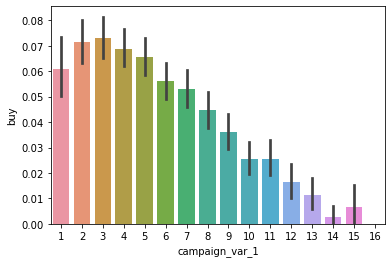

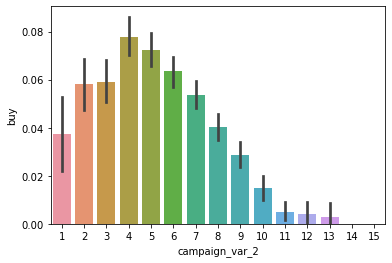

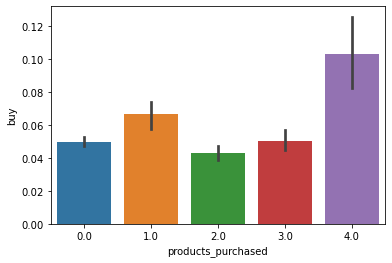

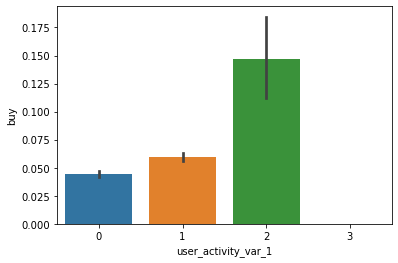

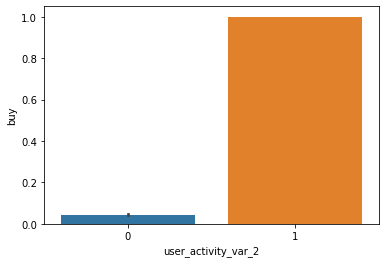

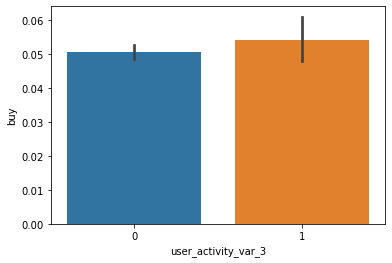

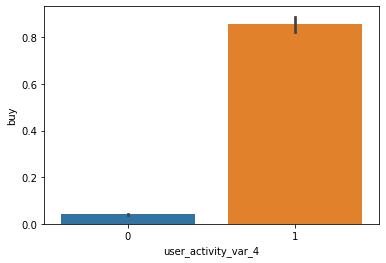

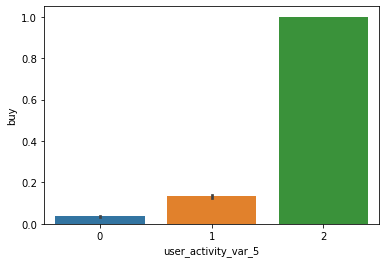

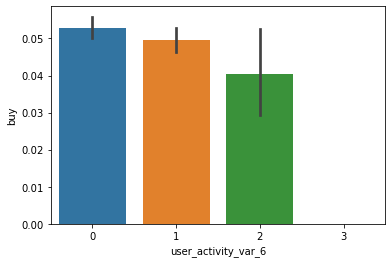

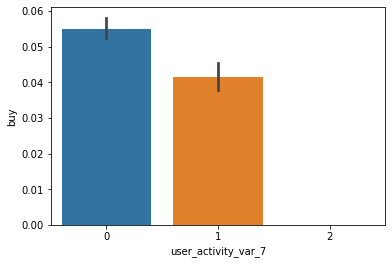

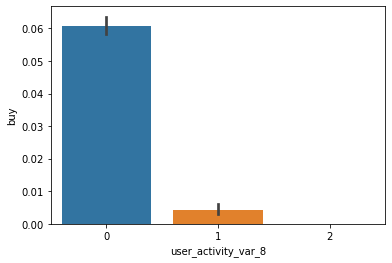

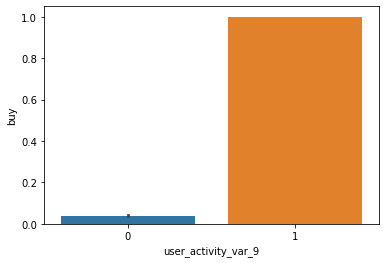

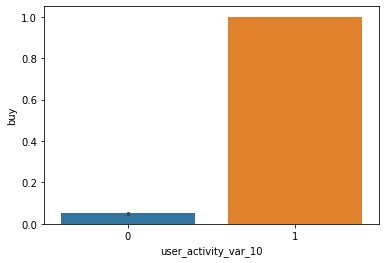

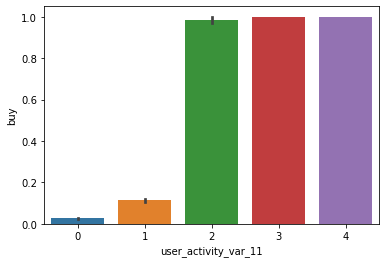

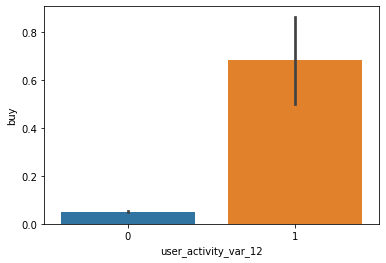

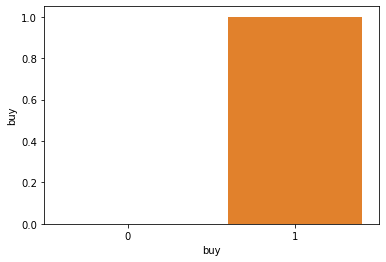

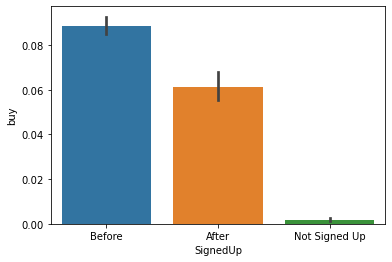

In [150]:
# All features have some differentiating factor, deleting none of them
for col in (train.columns):
    plt.figure()
    sns.barplot(x=col, y="buy",data=train, estimator=np.mean )
plt.show()

In [259]:
train.drop(['user_activity_var_3'],inplace=True,axis=1)
test.drop(['user_activity_var_3'],inplace=True,axis=1)

In [260]:
for i in train.columns:
    print(train[i].value_counts(normalize=True))

6     0.103700
5     0.103675
4     0.102602
3     0.096627
7     0.095912
2     0.089017
8     0.087000
9     0.073185
10    0.061081
11    0.047828
1     0.040678
12    0.037154
13    0.027042
14    0.018232
15    0.011644
16    0.004622
Name: campaign_var_1, dtype: float64
6     0.146677
7     0.139731
5     0.134062
8     0.119762
4     0.107582
9     0.090319
3     0.073619
10    0.058681
2     0.045658
11    0.036005
12    0.019433
1     0.015040
13    0.008963
14    0.003856
15    0.000613
Name: campaign_var_2, dtype: float64
0.0    0.533975
2.0    0.226424
3.0    0.128291
1.0    0.093026
4.0    0.018283
Name: products_purchased, dtype: float64
0    0.609509
1    0.380915
2    0.009550
3    0.000026
Name: user_activity_var_1, dtype: float64
0    0.993284
1    0.006716
Name: user_activity_var_2, dtype: float64
0    0.988535
1    0.011465
Name: user_activity_var_4, dtype: float64
0    0.848906
1    0.150686
2    0.000409
Name: user_activity_var_5, dtype: float64
0    0.530553
1   

<AxesSubplot:>

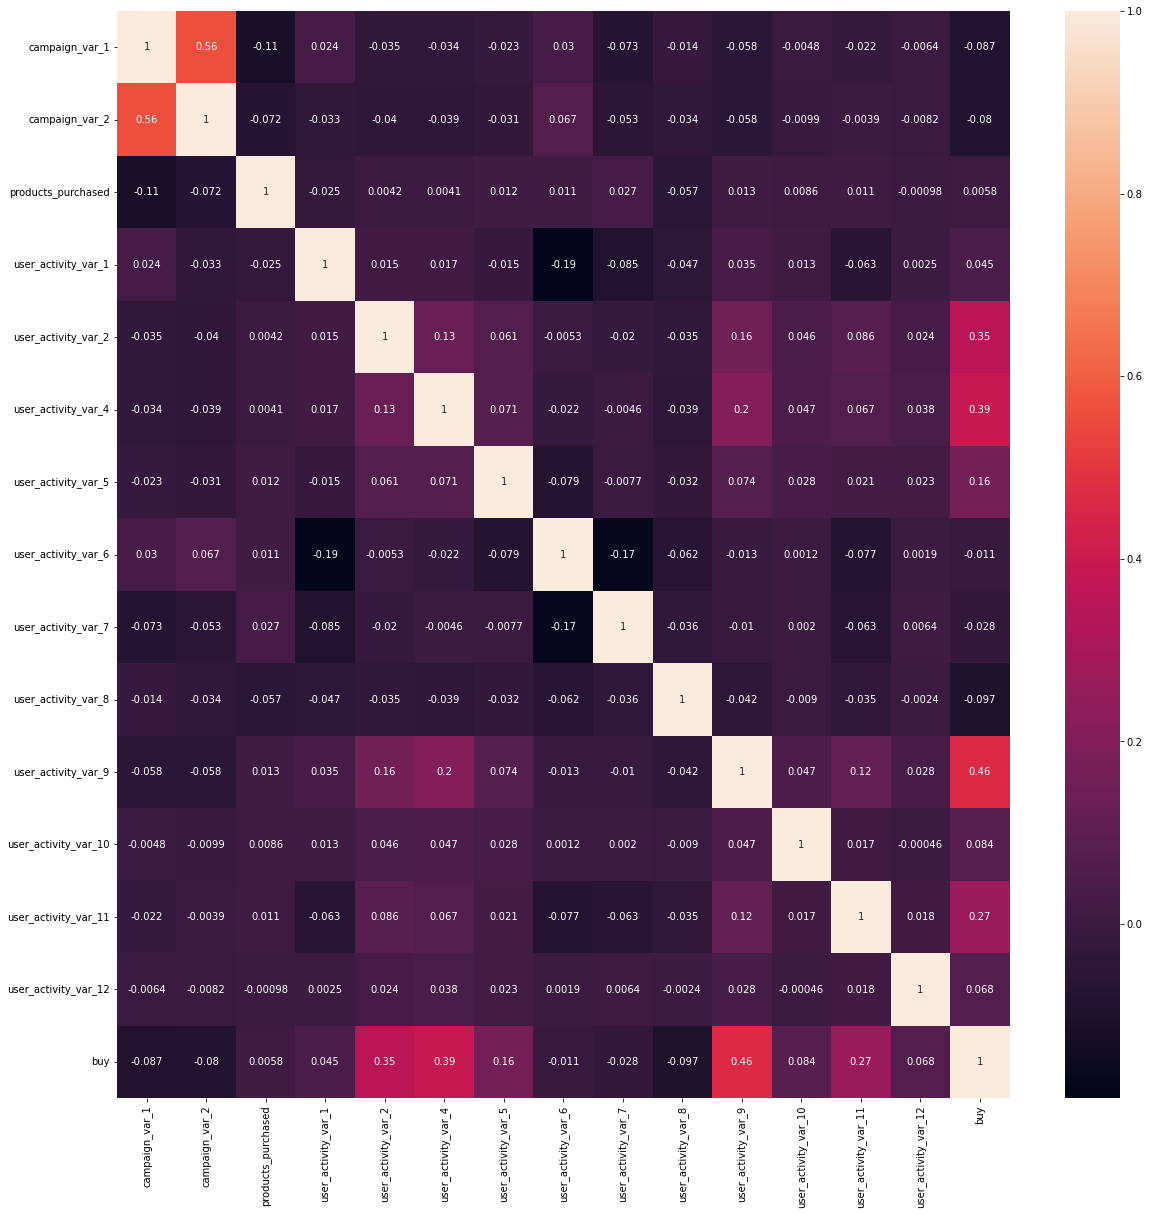

In [153]:
plt.figure(figsize=(20,20))
sns.heatmap(train.corr(),annot=True)

In [261]:
Y=train[['buy']]
X=train.drop(['buy'],axis=1)

In [262]:
#X = pd.get_dummies(X, drop_first = True)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X['SignedUp']= label_encoder.fit_transform(X['SignedUp'])
test['SignedUp']= label_encoder.fit_transform(test['SignedUp'])

In [263]:
X

,campaign_var_1,campaign_var_2,products_purchased,user_activity_var_1,user_activity_var_2,user_activity_var_4,user_activity_var_5,user_activity_var_6,user_activity_var_7,user_activity_var_8,user_activity_var_9,user_activity_var_10,user_activity_var_11,user_activity_var_12,SignedUp
0,1,2,2.0,0,0,0,0,0,1,1,0,0,0,0,1
1,2,1,2.0,1,0,0,0,0,1,0,0,0,0,0,1
2,9,3,3.0,1,0,0,0,0,0,0,0,0,0,0,0
3,6,7,2.0,0,0,0,0,0,0,0,0,0,0,0,1
4,4,6,0.0,0,0,0,0,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39156,11,11,2.0,1,0,0,1,1,1,0,0,0,0,0,1
39157,3,9,3.0,0,0,0,0,0,0,0,0,0,0,0,2
39158,8,7,2.0,1,0,0,1,0,1,0,0,0,0,0,2
39159,7,12,2.0,0,0,0,0,1,0,0,0,0,1,0,2


In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, Y, test_size=0.3, random_state=20)

In [265]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)
print("Buying Rate in Training Data",y_train.mean())
print("Buying Rate in Testing Data",y_test.mean())

Shape of Training Data (27412, 15)
Shape of Testing Data (11749, 15)
Buying Rate in Training Data buy    0.050927
dtype: float64
Buying Rate in Testing Data buy    0.051238
dtype: float64


In [266]:
# Building a Decision Tree Model
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier(criterion='gini',random_state=20)

In [267]:
np.random.seed(44)
from sklearn.model_selection import GridSearchCV
param_dist = {'max_depth': [3, 4, 5], 'min_samples_split': [50,120,180,200,250] }
tree_grid = GridSearchCV(dtree, cv = 10, param_grid=param_dist,n_jobs = 3)
tree_grid.fit(X_train,y_train) 
print('Best Parameters using grid search: \n', tree_grid.best_params_)

Best Parameters using grid search: 
 {'max_depth': 5, 'min_samples_split': 50}


In [268]:
dtree=DecisionTreeClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=50)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=50, random_state=20)

In [269]:
# Building a Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini',random_state=20,max_depth=5,min_samples_split=50)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, min_samples_split=50, random_state=20)

In [270]:
# Building a Gradient Boosting Model
from sklearn.ensemble import GradientBoostingClassifier
gbm=GradientBoostingClassifier(criterion='mse',random_state=20,max_depth=5,min_samples_split=50)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=50,
                           random_state=20)

In [271]:
y_pred_tree=dtree.predict(X_test)
y_pred_rf=rf.predict(X_test)
y_pred_gbm=gbm.predict(X_test)

In [272]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

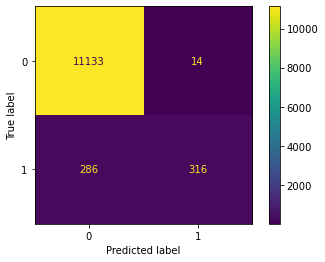

In [273]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

In [274]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.97446591199251
Precision 0.9575757575757575
Recall 0.5249169435215947
f1_score 0.6781115879828326


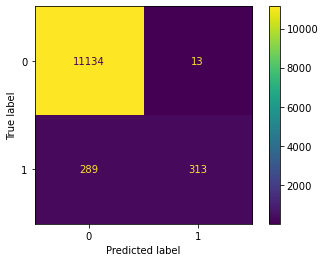

In [275]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

In [276]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf))
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.9742956847391268
Precision 0.9601226993865031
Recall 0.5199335548172758
f1_score 0.6745689655172414


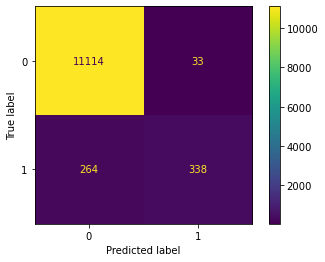

In [277]:
metrics.plot_confusion_matrix(gbm,X_test,y_test)

In [278]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.9747212528725849
Precision 0.9110512129380054
Recall 0.5614617940199336
f1_score 0.694758478931141


In [279]:
#test = pd.get_dummies(test, drop_first = True)

In [280]:
test_pred = gbm.predict(test)

In [281]:
sub = pd.read_csv('sample_submission.csv')
sub.head()

,id,buy
0,39162,1
1,39163,1
2,39164,1
3,39165,1
4,39166,1


In [282]:
sub['buy'] = test_pred
sub.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [283]:
sub.buy.mean()

0.025257888349514562

In [284]:
sub.to_csv('baseline_gbm.csv',index=False)

In [182]:
gbm_2=GradientBoostingClassifier(criterion='mse',random_state=20,max_depth=5,min_samples_split=50)
gbm_2.fit(X,Y)

GradientBoostingClassifier(criterion='mse', max_depth=5, min_samples_split=50,
                           random_state=20)

In [183]:
gbm_pred = gbm_2.predict(test)

In [184]:
sub['buy'] = gbm_pred
sub.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [185]:
sub.to_csv('baseline_gbm_2.csv',index=False)

In [65]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 100, stop = 500, num = 10)]
max_features = ['auto', 'sqrt']
max_depth = [4,7,10,12,15]
min_samples_split = [50,70,100,150,200]
bootstrap = [True, False]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 144, 188, 233, 277, 322, 366, 411, 455, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [4, 7, 10, 12, 15], 'min_samples_split': [50, 70, 100, 150, 200], 'bootstrap': [True, False]}


In [66]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, 
                               n_iter = 100, cv = 3, verbose=2, random_state=365, n_jobs = -1)

rf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Users/Adit/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598:

RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(max_depth=5,
                                                    min_samples_split=50,
                                                    random_state=20),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [4, 7, 10, 12, 15],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_split': [50, 70, 100, 150,
                                                              200],
                                        'n_estimators': [100, 144, 188, 233,
                                                         277, 322, 366, 411,
                                                         455, 500]},
                   random_state=365, verbose=2)

In [67]:
rf_random.best_params_

{'n_estimators': 277,
 'min_samples_split': 70,
 'max_features': 'sqrt',
 'max_depth': 12,
 'bootstrap': False}

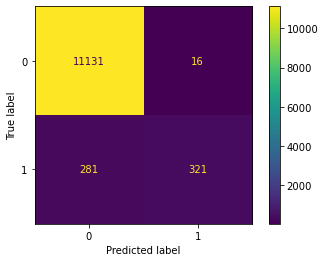

In [68]:
metrics.plot_confusion_matrix(rf_random,X_test,y_test)

In [69]:
y_pred_rf1=rf_random.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf1))
print("Precision",metrics.precision_score(y_test,y_pred_rf1))
print("Recall",metrics.recall_score(y_test,y_pred_rf1))
print("f1_score",metrics.f1_score(y_test,y_pred_rf1))

Accuracy: 0.9747212528725849
Precision 0.9525222551928784
Recall 0.5332225913621262
f1_score 0.6837060702875398


In [70]:
rf_test_pred = rf_random.predict(test)
sub['buy'] = rf_test_pred
sub.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [71]:
sub.to_csv('tuned_rf.csv',index=False)

In [357]:
gbm=GradientBoostingClassifier(criterion='mse',random_state=365,max_depth=5,min_samples_split=55,
                               n_estimators= 150,min_samples_leaf=5,max_features='sqrt',subsample=0.80)
gbm.fit(X_train,y_train)

GradientBoostingClassifier(criterion='mse', max_depth=5, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=55,
                           n_estimators=150, random_state=370, subsample=0.8)

In [358]:
y_pred_gbc=gbm.predict(X_test)


print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbc))
print("Precision",metrics.precision_score(y_test,y_pred_gbc))
print("Recall",metrics.recall_score(y_test,y_pred_gbc))
print("f1_score",metrics.f1_score(y_test,y_pred_gbc))

Accuracy: 0.9751468210060431
Precision 0.9211956521739131
Recall 0.5631229235880398
f1_score 0.6989690721649485


In [347]:
gbc_test_pred = gbm.predict(test)
sub['buy'] = gbc_test_pred
sub.head()

,id,buy
0,39162,1
1,39163,0
2,39164,0
3,39165,1
4,39166,0


In [348]:
sub.to_csv('gbm_2.csv',index=False)